# Credit Card Default Risk - Prediction

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# import warings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [4]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


### Inspect data and treat data

In [5]:
# check shape and length
print(train_data.shape)
print(len(train_data))

(45528, 19)
45528


In [6]:
print(test_data.shape)
print(len(test_data))

(11383, 18)
11383


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [8]:
# check for null values
train_data.isna().mean()*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.201458
owns_house                 0.000000
no_of_children             1.700053
net_yearly_income          0.000000
no_of_days_employed        1.016957
occupation_type            0.000000
total_family_members       0.182305
migrant_worker             0.191091
yearly_debt_payments       0.208663
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.017572
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64

In [9]:
train_data.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

Check for data imbalance

In [10]:
# check data imbalance
train_data.credit_card_default.value_counts(normalize=True)*100

0    91.879722
1     8.120278
Name: credit_card_default, dtype: float64

In [11]:
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [12]:
# get all categorical features
cols = train_data.columns 

for i in cols:
    if len(train_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(train_data[i].value_counts())
        print("*"*50)

Column Name: gender
F      29957
M      15570
XNA        1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    29743
Y    15238
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    31642
N    13886
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
8.0        1
7.0        1
9.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              9

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
<br>
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

In [13]:
train_data.isna().sum().sort_values(ascending=False).head(10)

no_of_children             774
owns_car                   547
no_of_days_employed        463
yearly_debt_payments        95
migrant_worker              87
total_family_members        83
credit_score                 8
customer_id                  0
default_in_last_6months      0
prev_defaults                0
dtype: int64

In [14]:
train_data[train_data['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [15]:
# change it to M as the name pronunces as Male
train_data['gender'] = train_data['gender'].apply(lambda x: 'M' if x=='XNA' else x)
train_data['gender'].value_counts()

F    29957
M    15571
Name: gender, dtype: int64

impute <i>no_of_children</i> using mode of the data

In [16]:
# fill no_of_children with mode of the data
train_data['no_of_children'].fillna(train_data['no_of_children'].mode()[0], inplace=True)

impute <i>owns_car</i> using mode of the data

In [17]:
# fill owns_car with mode of the data
train_data['owns_car'].fillna(train_data['owns_car'].mode()[0], inplace=True)

impute <i>no_of_days_employed</i> using Median based on <i>occupation_type</i> of the data

In [18]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = train_data.groupby(by='occupation_type')['no_of_days_employed'].median()
occp_days_employed

occupation_type
Accountants                1822.0
Cleaning staff             1509.0
Cooking staff              1429.5
Core staff                 1883.0
Drivers                    1342.0
HR staff                   1528.0
High skill tech staff      1728.0
IT staff                   1747.0
Laborers                   1687.0
Low-skill Laborers          983.0
Managers                   2118.0
Medicine staff             2826.0
Private service staff      1718.0
Realty agents              1390.0
Sales staff                1276.0
Secretaries                2001.5
Security staff             1419.0
Unknown                  365241.0
Waiters/barmen staff       1258.0
Name: no_of_days_employed, dtype: float64

In [19]:
occp_days_employed['Accountants']

1822.0

In [20]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
for i in occp_days_employed.index:
    train_data['no_of_days_employed'] = np.where((train_data['no_of_days_employed'].isna()) & (train_data['occupation_type'] == i), occp_days_employed[i], train_data['no_of_days_employed'])

In [21]:
train_data.no_of_days_employed.isna().sum()

0

impute <i>yearly_debt_payments</i> using Median based on <i>credit_card_default</i> of the data

In [22]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = train_data.groupby(by='credit_card_default')['yearly_debt_payments'].median()
yearDebt_credit

credit_card_default
0    29076.84
1    29133.40
Name: yearly_debt_payments, dtype: float64

In [23]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
for i in yearDebt_credit.index:
    train_data['yearly_debt_payments'] = np.where((train_data['yearly_debt_payments'].isna()) & (train_data['credit_card_default'] == i), yearDebt_credit[i], train_data['yearly_debt_payments'])

In [24]:
train_data['yearly_debt_payments'].isna().sum()

0

Let's check any more null values pending in features

In [25]:
train_data.isna().sum().sort_values(ascending=False).head(10)

migrant_worker             87
total_family_members       83
credit_score                8
customer_id                 0
default_in_last_6months     0
prev_defaults               0
credit_limit_used(%)        0
credit_limit                0
yearly_debt_payments        0
occupation_type             0
dtype: int64

impute <i>migrant_worker</i> using Mode of the data

In [26]:
train_data['migrant_worker'].mode()[0]

0.0

In [27]:
# imputing with mode of the data
train_data['migrant_worker'].fillna(train_data['migrant_worker'].mode()[0], inplace=True)

# check null values count
train_data['migrant_worker'].isna().sum()

0

impute <i>total_family_members</i> using Mode of the data

In [28]:
train_data['total_family_members'].mode()[0]

2.0

In [29]:
# imputing with mode of the data
train_data['total_family_members'].fillna(train_data['total_family_members'].mode()[0], inplace=True)

# check null values count
train_data['total_family_members'].isna().sum()

0

impute <i>credit_score</i> using Median based on <i>credit_card_default</i> of the data

In [30]:
# check medians of credit_score wrt credit_card_default
cred_score = train_data.groupby(by='credit_card_default')['credit_score'].median()
cred_score

credit_card_default
0    799.0
1    599.0
Name: credit_score, dtype: float64

In [31]:
# impute 'credit_score' with median based on 'credit_card_default'
for i in cred_score.index:
    train_data['credit_score'] = np.where((train_data['credit_score'].isna()) & (train_data['credit_card_default'] == i), cred_score[i], train_data['credit_score'])

# check for null values in 'credit_score'
train_data['credit_score'].isna().sum()

0

**Check for Null values in the Data Set**

In [32]:
train_data.isna().mean()*100

customer_id                0.0
name                       0.0
age                        0.0
gender                     0.0
owns_car                   0.0
owns_house                 0.0
no_of_children             0.0
net_yearly_income          0.0
no_of_days_employed        0.0
occupation_type            0.0
total_family_members       0.0
migrant_worker             0.0
yearly_debt_payments       0.0
credit_limit               0.0
credit_limit_used(%)       0.0
credit_score               0.0
prev_defaults              0.0
default_in_last_6months    0.0
credit_card_default        0.0
dtype: float64

## EDA

In [33]:
train_data.head(10)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.0,252765.91,2898.0,Accountants,2.0,1.0,37046.86,40245.64,19,937.0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.0,262389.20,5541.0,High skill tech staff,3.0,0.0,50839.39,41311.08,42,733.0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.0,241211.39,1448.0,Core staff,3.0,0.0,30008.46,32209.22,91,906.0,0,0,0
8,CST_133768,Ashutosh,40,F,N,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.0,207109.13,2791.0,High skill tech staff,4.0,0.0,9509.10,28425.52,14,666.0,0,0,0


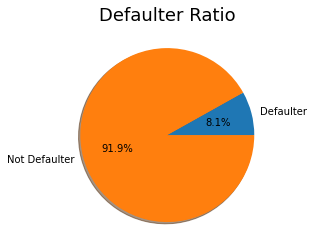

In [34]:
# Ploting Credit_default ratio
total_default_values = train_data.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

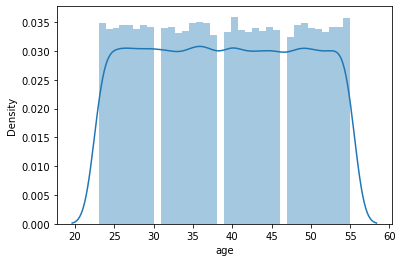

In [35]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(train_data['age'])
plt.show()

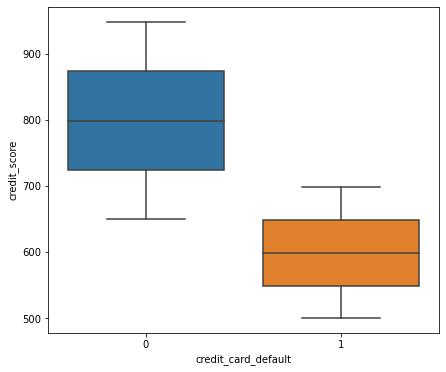

In [36]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_score'])
plt.show()

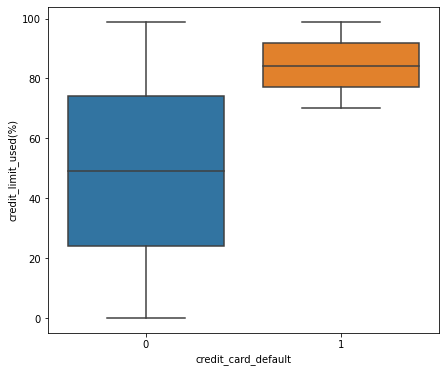

In [37]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(train_data['credit_card_default'], train_data['credit_limit_used(%)'])
plt.show()

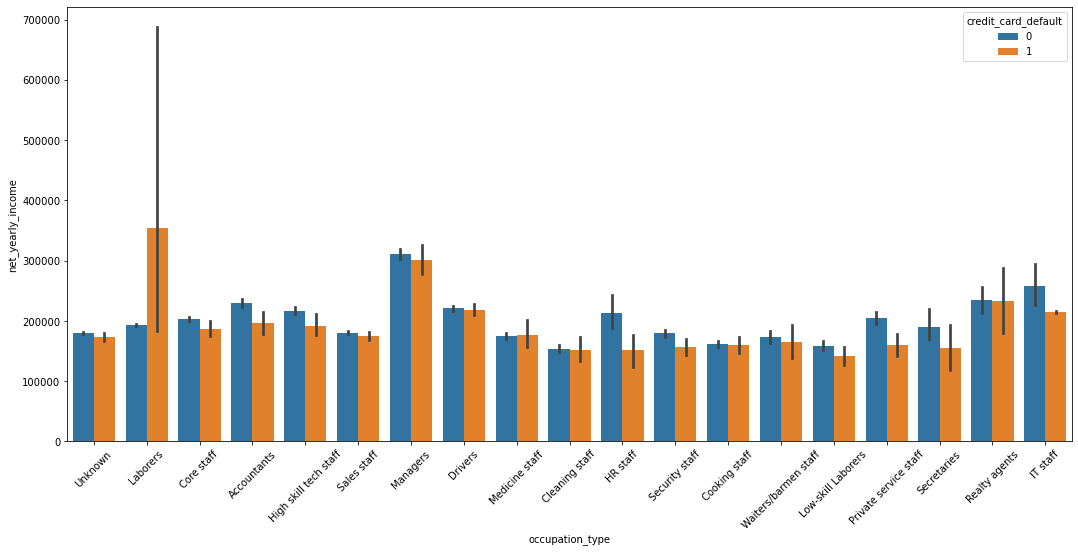

In [38]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=train_data['occupation_type'], y=train_data['net_yearly_income'], hue=train_data['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

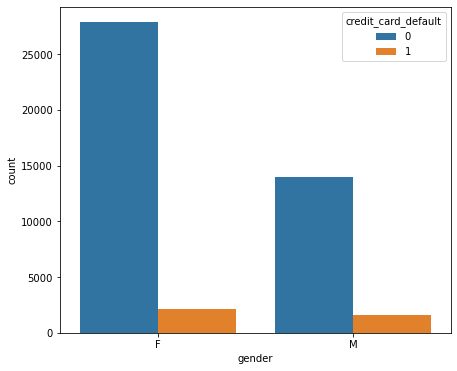

In [39]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(train_data['gender'], hue=train_data['credit_card_default'])
plt.show()

**Check outliers for continuous valued features**

In [40]:
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


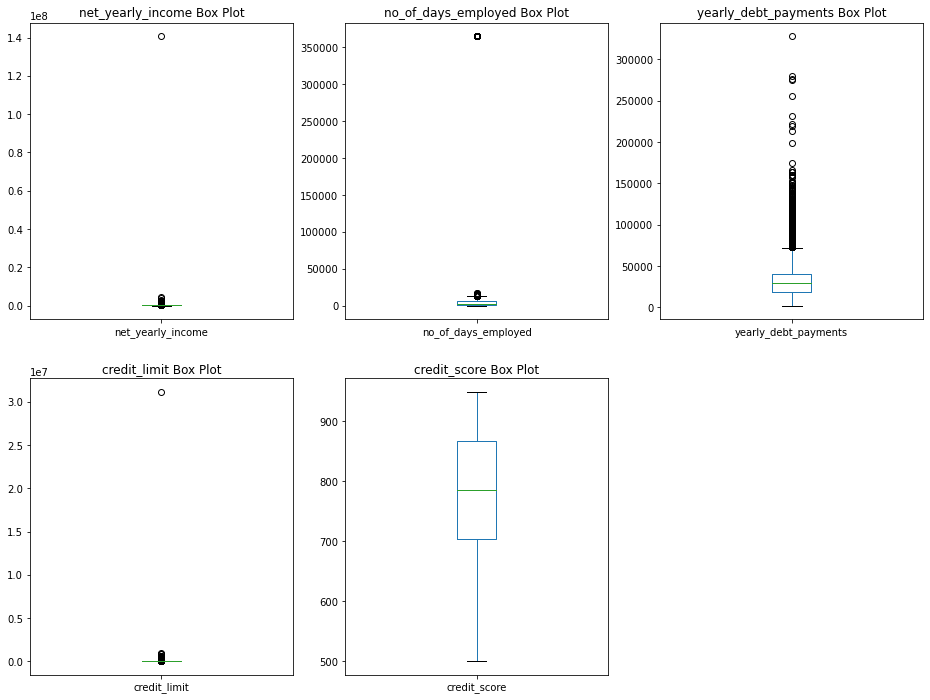

In [41]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

Check and treat outliers for 'net_yearly_income'

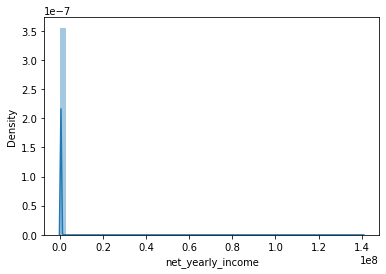

In [42]:
# net_yearly_income distribution plot
sns.distplot(train_data['net_yearly_income'])
plt.show()

In [43]:
train_data['net_yearly_income'].quantile([0.25, 0.5, 0.75, 0.99, 0.998, 1.0])

0.250    1.263458e+05
0.500    1.717149e+05
0.750    2.406038e+05
0.990    5.779015e+05
0.998    9.060748e+05
1.000    1.407590e+08
Name: net_yearly_income, dtype: float64

In [44]:
train_data[train_data['net_yearly_income']>train_data['net_yearly_income'].quantile(0.998)]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
1247,CST_135358,Olivia,36,M,Y,N,0.0,1013421.02,65.0,Managers,2.0,0.0,75840.29,157938.53,1,840.0,0,0,0
1779,CST_148941,Damouni,35,F,N,N,0.0,978559.07,2456.0,Accountants,1.0,0.0,47607.58,215405.86,75,927.0,0,0,0
2267,CST_160056,Stempel,30,F,N,N,0.0,955727.98,3948.0,Accountants,2.0,0.0,75489.03,221929.39,33,800.0,0,0,0
3085,CST_103838,Harry Papachristou,38,M,Y,Y,0.0,1016754.28,1502.0,Unknown,1.0,0.0,67821.69,219584.74,51,891.0,0,0,0
3344,CST_150511,Gralla,25,M,Y,Y,0.0,1245944.27,9523.0,Managers,1.0,0.0,55128.93,248347.92,27,828.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44446,CST_165896,Kim,26,F,Y,N,0.0,977927.55,4120.0,Sales staff,1.0,0.0,83358.84,251670.25,34,944.0,0,0,0
44633,CST_157471,Ferreira-Marques,40,F,Y,N,0.0,4433825.02,865.0,Unknown,2.0,1.0,78971.72,548115.45,19,837.0,0,0,0
45116,CST_125599,"""John ODonnell""",23,M,N,Y,0.0,1012150.16,3265.0,Managers,2.0,0.0,83782.01,267512.16,4,714.0,0,0,0
45158,CST_147033,Kihara,33,M,Y,N,2.0,984019.98,2488.0,Unknown,4.0,1.0,72571.25,315461.88,29,789.0,0,0,0


Remove the outlier that are more than 99.8% quantile or net_yearly_income

In [45]:
train_data = train_data[train_data['net_yearly_income']<=train_data['net_yearly_income'].quantile(0.998)]

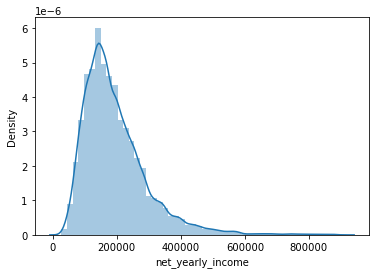

In [46]:
# net_yearly_income distribution plot
sns.distplot(train_data['net_yearly_income'])
plt.show()

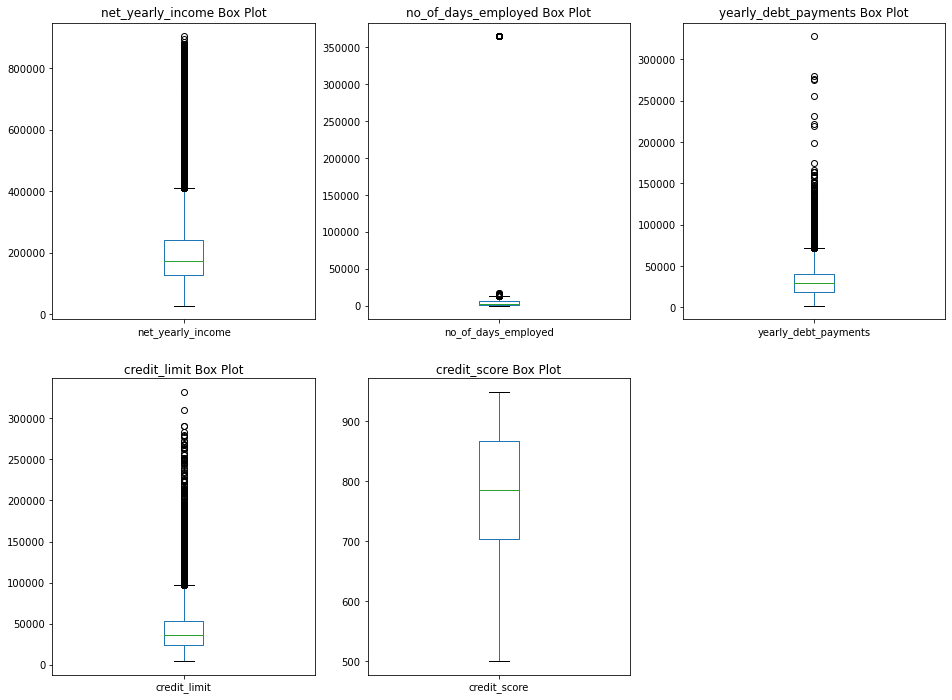

In [47]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

Check and treat outliers for 'no_of_days_employed'

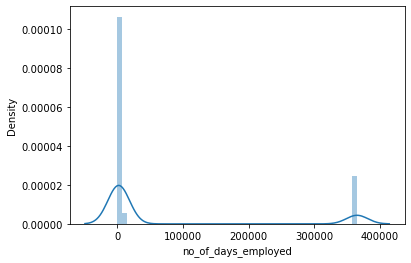

In [48]:
# no_of_days_employed distribution plot
sns.distplot(train_data['no_of_days_employed'])
plt.show()

In [49]:
train_data['no_of_days_employed'].quantile([0.25, 0.5, 0.75, 0.8185, 0.99, 1.0])

0.2500       946.000
0.5000      2208.000
0.7500      5854.000
0.8185     14890.795
0.9900    365252.000
1.0000    365252.000
Name: no_of_days_employed, dtype: float64

From the above no_of_days_employed feature, there are vales like 365252 days. Which means around 1000 years and makes no sense.
<br>
So removing those outliers also.

In [50]:
# check data greater than 81.85%ile of no_of_days_employed feature
new_trainTEST_data = train_data[train_data['no_of_days_employed']>train_data['no_of_days_employed'].quantile(0.8185)]
new_trainTEST_data

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
12,CST_147654,Baker,39,F,N,Y,0.0,68421.10,365247.0,Unknown,2.0,0.0,13781.53,17110.01,72,643.0,1,1,1
29,CST_149142,"ODonnell""",26,M,Y,N,0.0,172067.42,365251.0,Unknown,2.0,0.0,24199.23,22155.88,49,886.0,0,0,0
32,CST_119708,Anna Driver,32,M,Y,N,0.0,206413.69,365247.0,Unknown,2.0,0.0,22419.59,74423.73,72,766.0,0,0,0
45,CST_105775,Diane Bartz,50,F,Y,Y,0.0,173396.95,365241.0,Unknown,1.0,0.0,10764.89,28296.94,3,811.0,0,0,0
48,CST_165701,da,48,F,N,N,0.0,145514.36,365240.0,Unknown,1.0,0.0,27222.39,39851.78,22,717.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45509,CST_160135,Sullivan,28,F,N,N,0.0,109872.55,365252.0,Unknown,2.0,0.0,17022.95,23985.85,56,798.0,0,0,0
45510,CST_116622,Fredrik Dahl,38,F,N,Y,0.0,52827.82,365242.0,Unknown,2.0,0.0,19245.70,13756.60,13,907.0,0,0,0
45512,CST_101246,Emily Kaiser,24,F,N,Y,0.0,140729.06,365251.0,Unknown,2.0,0.0,18350.70,15661.53,27,752.0,0,0,0
45513,CST_120555,"""John ODonnell""",49,M,N,Y,0.0,223193.44,365242.0,Unknown,2.0,0.0,19881.38,48985.19,72,940.0,0,0,0


In [51]:
new_trainTEST_data.credit_card_default.value_counts(normalize=True)*100

0    94.591973
1     5.408027
Name: credit_card_default, dtype: float64

In [52]:
new_trainTEST_data_final = train_data[train_data['no_of_days_employed']<=train_data['no_of_days_employed'].quantile(0.8185)]

In [53]:
new_trainTEST_data_final.credit_card_default.value_counts(normalize=True)*100

0    91.274302
1     8.725698
Name: credit_card_default, dtype: float64

**Let us remove those 20% of the outliers in our initial training and proceed with the remaining 81.85%ile as the the data imbalance percentage doesn't change even after droping those data points**

In [54]:
# remove outliers greater than 81.85%ile of no_of_days_employed
train_data = train_data[train_data['no_of_days_employed']<=train_data['no_of_days_employed'].quantile(0.8185)]

In [55]:
# check the shape of remaining data
train_data.shape

(37189, 19)

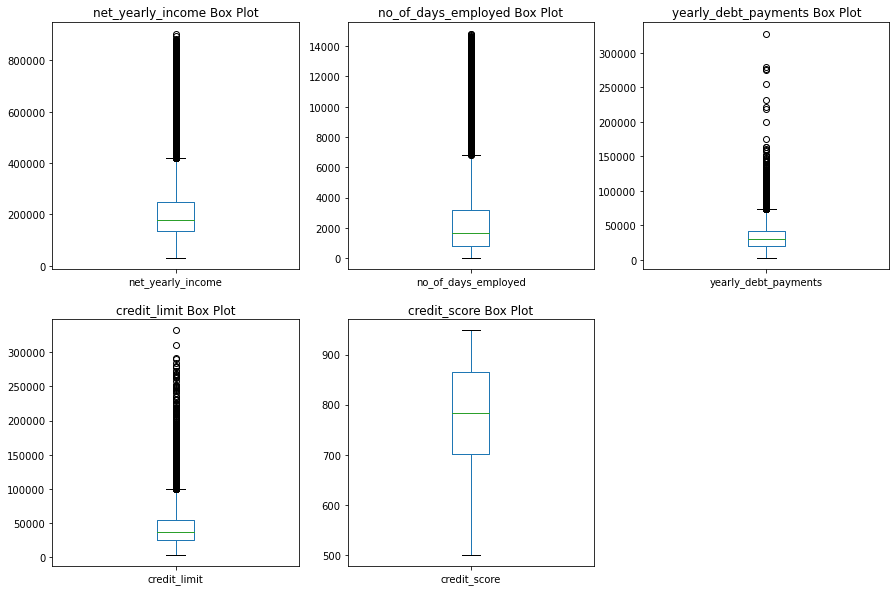

In [56]:
# boxplot of all continuous variables

plt.figure(figsize=[15, 10])
plt.subplot(2,3,1)
train_data['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
train_data['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
train_data['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
train_data['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
train_data['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

In [57]:
train_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


### Data Preparation

In [58]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
train_data.drop(['customer_id', 'name'], axis=1, inplace=True)
train_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


**Encode Categorical Column labels with value between 0 and n_classes-1**

In [59]:
lm = LabelEncoder()

# get categorical columns
cat_cols = train_data.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols:
    train_data[i] = lm.fit_transform(train_data[i])
    
train_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0,0,1,0.0,107934.04,612.0,17,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,1,0,1,0.0,109862.62,2771.0,8,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,1,0,1,0.0,230153.17,204.0,8,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0,0,1,0.0,122325.82,11941.0,3,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,1,1,1,0.0,387286.00,1459.0,3,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


## Train-Test Split

In [60]:
# split train-test data
X = train_data.drop(['credit_card_default'], axis=1)
y = train_data['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (26032, 16) (11157, 16)
y= (26032,) (11157,)


### Feature Scaling

In [61]:
# scaling the features to standardize
scaler = StandardScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [62]:
X_train.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
40446,1.366010,-0.775740,1.308199,-1.464876,-0.651571,-1.511499,-0.447058,0.883327,-1.335451,-0.52805,-1.249964,-1.173813,-1.619284,-0.470474,-0.238892,-0.240824
37043,1.051866,-0.775740,1.308199,0.682652,-0.651571,-0.313942,0.255419,-0.634643,-0.272318,-0.52805,0.664051,-0.145278,0.185636,0.894001,-0.238892,-0.240824
8788,1.366010,1.289092,1.308199,-1.464876,-0.651571,-0.415310,1.691993,-1.014135,-0.272318,1.89376,0.479446,-0.579513,0.832683,-0.638562,-0.238892,-0.240824
29771,-1.356573,-0.775740,1.308199,0.682652,1.985713,0.502028,0.387881,-0.634643,1.853949,1.89376,1.266854,-0.439191,-0.086804,0.172214,-0.238892,-0.240824
16477,-1.251859,-0.775740,-0.764410,0.682652,-0.651571,-0.371635,0.633577,0.124342,-0.272318,1.89376,-0.278067,-0.941824,-0.188970,0.399626,-0.238892,-0.240824


#### Data Imbalance Handling

Using SMOTE method, we can balance the data w.r.t. credit_card_default variable and proceed further

In [63]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [64]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (47522, 16)
Dimension of y_train_sm Shape: (47522,)


In [65]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (47522, 16)
y_train.shape: (47522,)


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,1.366010,-0.775740,1.308199,-1.464876,-0.651571,-1.511499,-0.447058,0.883327,-1.335451,-0.52805,-1.249964,-1.173813,-1.619284,-0.470474,-0.238892,-0.240824
1,1.051866,-0.775740,1.308199,0.682652,-0.651571,-0.313942,0.255419,-0.634643,-0.272318,-0.52805,0.664051,-0.145278,0.185636,0.894001,-0.238892,-0.240824
2,1.366010,1.289092,1.308199,-1.464876,-0.651571,-0.415310,1.691993,-1.014135,-0.272318,1.89376,0.479446,-0.579513,0.832683,-0.638562,-0.238892,-0.240824
3,-1.356573,-0.775740,1.308199,0.682652,1.985713,0.502028,0.387881,-0.634643,1.853949,1.89376,1.266854,-0.439191,-0.086804,0.172214,-0.238892,-0.240824
4,-1.251859,-0.775740,-0.764410,0.682652,-0.651571,-0.371635,0.633577,0.124342,-0.272318,1.89376,-0.278067,-0.941824,-0.188970,0.399626,-0.238892,-0.240824


## Logistic Regression

In [66]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:",accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

**Prediction**

[[22608  1153]
 [  628 23133]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23761
           1       0.95      0.97      0.96     23761

    accuracy                           0.96     47522
   macro avg       0.96      0.96      0.96     47522
weighted avg       0.96      0.96      0.96     47522

Accuracy of TRAIN data: 96.25226211018055
F1_Score of TRAIN data: 96.25180465199385
[[9726  457]
 [  57  917]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10183
           1       0.67      0.94      0.78       974

    accuracy                           0.95     11157
   macro avg       0.83      0.95      0.88     11157
weighted avg       0.97      0.95      0.96     11157

Accuracy of TEST data: 0.9539302679931881
F1_Score of TEST data: 87.7673262604349


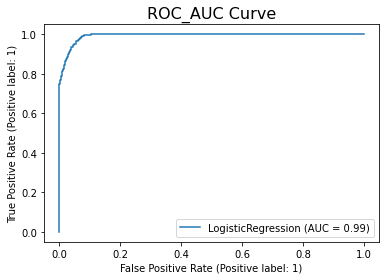

In [68]:
# prediction
evaluation(logreg)

## Predict on Actual TEST Data

In [69]:
test_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [70]:
test_data.shape

(11383, 18)

In [71]:
test_data.isna().mean()*100

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   1.159624
owns_house                 0.000000
no_of_children             1.669156
net_yearly_income          0.000000
no_of_days_employed        0.922428
occupation_type            0.000000
total_family_members       0.272336
migrant_worker             0.228411
yearly_debt_payments       0.193271
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.026355
prev_defaults              0.000000
default_in_last_6months    0.000000
dtype: float64

In [72]:
test_data.isna().sum().sort_values(ascending=False).head(10)

no_of_children          190
owns_car                132
no_of_days_employed     105
total_family_members     31
migrant_worker           26
yearly_debt_payments     22
credit_score              3
customer_id               0
prev_defaults             0
credit_limit_used(%)      0
dtype: int64

impute <i>no_of_children</i> with mode of the data

impute <i>owns_car</i> using mode of the data

impute <i>no_of_days_employed</i> using median of the data

In [73]:
# fill no_of_children with mode of the data
test_data['no_of_children'].fillna(test_data['no_of_children'].mode()[0], inplace=True)

# fill owns_car with mode of the data
test_data['owns_car'].fillna(test_data['owns_car'].mode()[0], inplace=True)

# fill no_of_days_employed with median of the data
test_data['no_of_days_employed'].fillna(test_data['no_of_days_employed'].median(), inplace=True)

impute <i>total_family_members</i> with mode, <i>migrant_worker</i> with mode, <i>yearly_debt_payments</i> with median and <i>credit_score</i> with median

In [74]:
# fillna wrt to their medians and modes
test_data['total_family_members'].fillna(test_data['total_family_members'].mode()[0], inplace=True)
test_data['migrant_worker'].fillna(test_data['migrant_worker'].mode()[0], inplace=True)
test_data['yearly_debt_payments'].fillna(test_data['yearly_debt_payments'].median(), inplace=True)
test_data['credit_score'].fillna(test_data['credit_score'].median(), inplace=True)

In [75]:
# check for null values
test_data.isna().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [76]:
test_data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [77]:
# get all categorical features
cols = test_data.columns 

for i in cols:
    if len(test_data[i].value_counts())<=20:
        print("Column Name:",i)
        print(test_data[i].value_counts())
        print("*"*50)

Column Name: gender
F      7443
M      3939
XNA       1
Name: gender, dtype: int64
**************************************************
Column Name: owns_car
N    7504
Y    3879
Name: owns_car, dtype: int64
**************************************************
Column Name: owns_house
Y    7861
N    3522
Name: owns_house, dtype: int64
**************************************************
Column Name: no_of_children
0.0     8015
1.0     2248
2.0      957
3.0      138
4.0       19
5.0        4
11.0       1
7.0        1
Name: no_of_children, dtype: int64
**************************************************
Column Name: occupation_type
Unknown                  3546
Laborers                 2071
Sales staff              1176
Core staff               1018
Managers                  806
Drivers                   703
High skill tech staff     405
Accountants               365
Medicine staff            318
Security staff            252
Cooking staff             208
Cleaning staff            164
Private ser

In [78]:
test_data[test_data['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
3510,CST_141289,Jan,25,XNA,Y,Y,0.0,219109.11,10041.0,Unknown,2.0,0.0,22295.99,27709.34,3,807.0,0,0


In [79]:
# lets impute with F as its mode of the feature
test_data['gender'] = test_data['gender'].apply(lambda x: 'F' if x=='XNA' else x)
test_data['gender'].value_counts()

F    7444
M    3939
Name: gender, dtype: int64

In [80]:
# get the cutomer_id column to new dataframe and drop in the original data fram
final_df = pd.DataFrame(test_data.customer_id)

In [81]:
test_data.drop(['customer_id', 'name'], axis=1, inplace=True)
test_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


### Data Preparation

#### Label Encoding

In [82]:
# get categorical columns
cat_cols_test = test_data.select_dtypes(include=['object']).columns

# encode labels for categorical columns
for i in cat_cols_test:
    test_data[i] = lm.fit_transform(test_data[i])
    
test_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,0,1,0,0.0,232640.53,998.0,17,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,0,0,0,1.0,284396.79,1338.0,17,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,0,0,0,1.0,149419.28,1210.0,17,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,0,0,0,1.0,160437.54,503.0,8,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,1,0,1,0.0,233480.37,157.0,8,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [83]:
test_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,0,1,0,0.0,232640.53,998.0,17,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,48,0,0,0,1.0,284396.79,1338.0,17,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,50,0,0,0,1.0,149419.28,1210.0,17,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,30,0,0,0,1.0,160437.54,503.0,8,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,52,1,0,1,0.0,233480.37,157.0,8,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [84]:
cols_test = test_data.columns
cols_test

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months'],
      dtype='object')

#### Feature Scaling

In [85]:
cols_test = test_data.columns

test_data[cols_test] = scaler.transform(test_data[cols_test])
test_data.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,1.366010,-0.775740,1.308199,-1.464876,-0.651571,0.278856,-0.597466,1.452566,-0.272318,-0.52805,-1.041777,-0.634093,-1.653339,-0.015649,-0.238892,-0.240824
1,0.947151,-0.775740,-0.764410,-1.464876,0.667071,0.773723,-0.452185,1.452566,0.790816,-0.52805,1.437874,0.898963,0.594298,0.251314,-0.238892,-0.240824
2,1.156581,-0.775740,-0.764410,-1.464876,0.667071,-0.516864,-0.506879,1.452566,0.790816,-0.52805,-0.627040,-0.682336,0.628353,-2.497412,7.060226,-0.240824
3,-0.937714,-0.775740,-0.764410,-1.464876,0.667071,-0.411513,-0.808978,-0.255150,-0.272318,1.89376,-0.202201,-0.538265,-1.483064,0.340301,-0.238892,-0.240824
4,1.366010,1.289092,-0.764410,0.682652,-0.651571,0.286886,-0.956823,-0.255150,-0.272318,1.89376,1.249841,1.380205,1.002959,-1.656974,3.410667,4.152405


#### Prediction

In [86]:
predicted_target = logreg.predict(test_data)
predicted_target[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
final_df['credit_card_default'] = predicted_target

In [88]:
final_df.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [89]:
# # save it to file and submit
# final_df.to_csv('LogRegg_submission.csv', index=False)
# print('Output Saved to CSV File!!')